# Instalation

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset

### Mount from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Copy and unzip final_dataset.zip into colab environment

In [4]:
!cp -r /content/drive/MyDrive/Bangkit/project/final_dataset.zip /content

In [10]:
!mkdir -p /content/dataset
!unzip /content/final_dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_5723.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_5776.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_5901.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_6198.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_6231.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_6356.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_6379.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_6771.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_7166.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_729.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_7528.jpg  
  inflating: /content/dataset/train/mites_and_trips/mites_trips_30_8083.jpg  
  inflating: /

### Define variables for dataset directory

In [11]:
TRAIN_DIR ='/content/dataset/train'
VALIDATION_DIR = '/content/dataset/val'
TEST_DIR = '/content/dataset/test'

### Show example data for each class

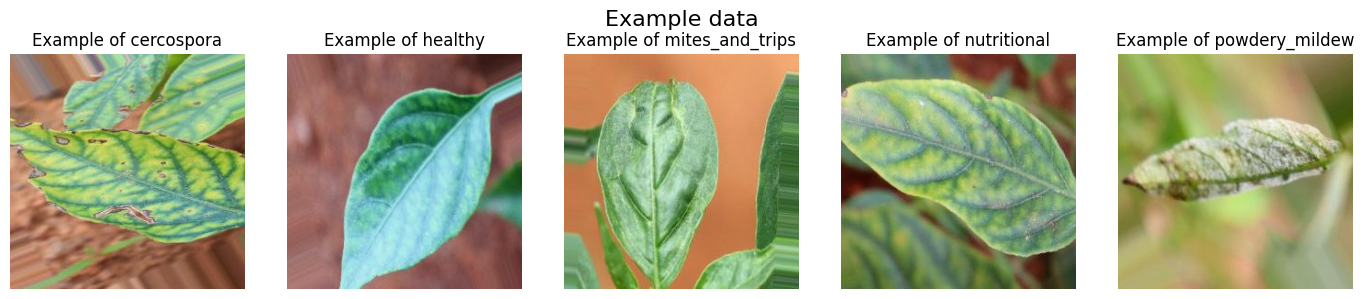

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(14, 3))
fig.suptitle('Example data', fontsize=16)

for ii, letter in enumerate(['cercospora', 'healthy', 'mites_and_trips', 'nutritional', 'powdery_mildew']):
    dir = f'{TRAIN_DIR}/{letter}'
    try:
        img = tf.keras.preprocessing.image.load_img(dir + '/' + os.listdir(dir)[0])
        axes[ii].imshow(img)
        axes[ii].set_title(f'Example of {letter}')
        axes[ii].axis('off')
    except FileNotFoundError:
        print(f'Error: Directory {dir} not found')
    except IndexError:
        print(f'Error: No images found in directory {dir}')

plt.tight_layout()
plt.show()

### Convert the image into its numpy array representation

In [14]:
sample_array = tf.keras.preprocessing.image.img_to_array(img)
print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (256, 256, 3)


In [15]:
sample_array[0,:5]

array([[145., 165.,  80.],
       [145., 165.,  80.],
       [146., 166.,  79.],
       [147., 167.,  80.],
       [145., 168.,  80.]], dtype=float32)

In [16]:
def train_val_test_datasets():
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TRAIN_DIR,
        image_size=(256, 256),
        batch_size=32,
        shuffle=True,
        seed=123,
        label_mode='categorical',
        color_mode="rgb"
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=VALIDATION_DIR,
        image_size=(256, 256),
        batch_size=32,
        seed=123,
        label_mode='categorical',
        color_mode="rgb"
    )

    test_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TEST_DIR,
        image_size=(256, 256),
        batch_size=32,
        seed=123,
        label_mode='categorical',
        color_mode="rgb"
    )

    return train_dataset, validation_dataset, test_dataset

In [17]:
train_dataset, validation_dataset, test_dataset= train_val_test_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")
print(f"Images of test dataset have shape: {test_dataset.element_spec[0].shape}")
print(f"Labels of test dataset have shape: {test_dataset.element_spec[1].shape}")

Found 8120 files belonging to 5 classes.
Found 1015 files belonging to 5 classes.
Found 1015 files belonging to 5 classes.
Images of train dataset have shape: (None, 256, 256, 3)
Labels of train dataset have shape: (None, 5)
Images of validation dataset have shape: (None, 256, 256, 3)
Labels of validation dataset have shape: (None, 5)
Images of test dataset have shape: (None, 256, 256, 3)
Labels of test dataset have shape: (None, 5)


# Create model

In [18]:
def create_model():
    model = tf.keras.models.Sequential([
            tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
            tf.keras.layers.Dropout(0.4),

            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),

            tf.keras.layers.Dense(5, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             6

 Total params: 304,433 (1.16 MB)

 Trainable params: 304,299 (1.16 MB)

 Non-trainable params: 134 (536.00 B)

In [21]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)


history = model.fit(train_dataset,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_dataset,
                    callbacks=[lr_scheduler])

Epoch 1/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.4761 - loss: 1.2261 - val_accuracy: 0.4512 - val_loss: 1.3682 - learning_rate: 3.0000e-04
Epoch 2/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7369 - loss: 0.6891 - val_accuracy: 0.7941 - val_loss: 0.6245 - learning_rate: 3.0000e-04
Epoch 3/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7911 - loss: 0.5503 - val_accuracy: 0.8374 - val_loss: 0.4886 - learning_rate: 3.0000e-04
Epoch 4/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8405 - loss: 0.4451 - val_accuracy: 0.8256 - val_loss: 0.4998 - learning_rate: 3.0000e-04
Epoch 5/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8625 - loss: 0.3627 - val_accuracy: 0.8906 - val_loss: 0.3567 - learning_rate: 3.0000e-04
Epoch 6/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8903 - loss: 0.2868 - val_accuracy: 0.8906 - val_loss: 0.3099 - learning_rate: 3.0000e-04
Epoch 7/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/ste

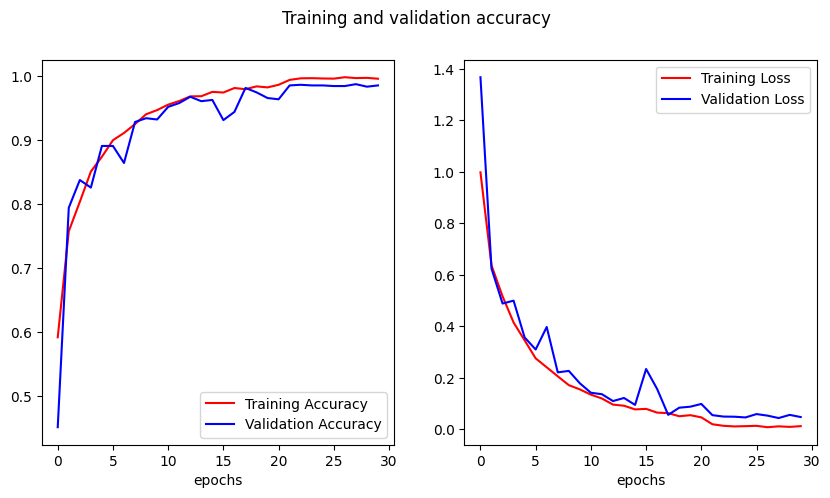

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(test_dataset, batch_size=32, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9904 - loss: 0.0227
Test Loss: 0.025819646194577217
Test Accuracy: 0.9891625642776489


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


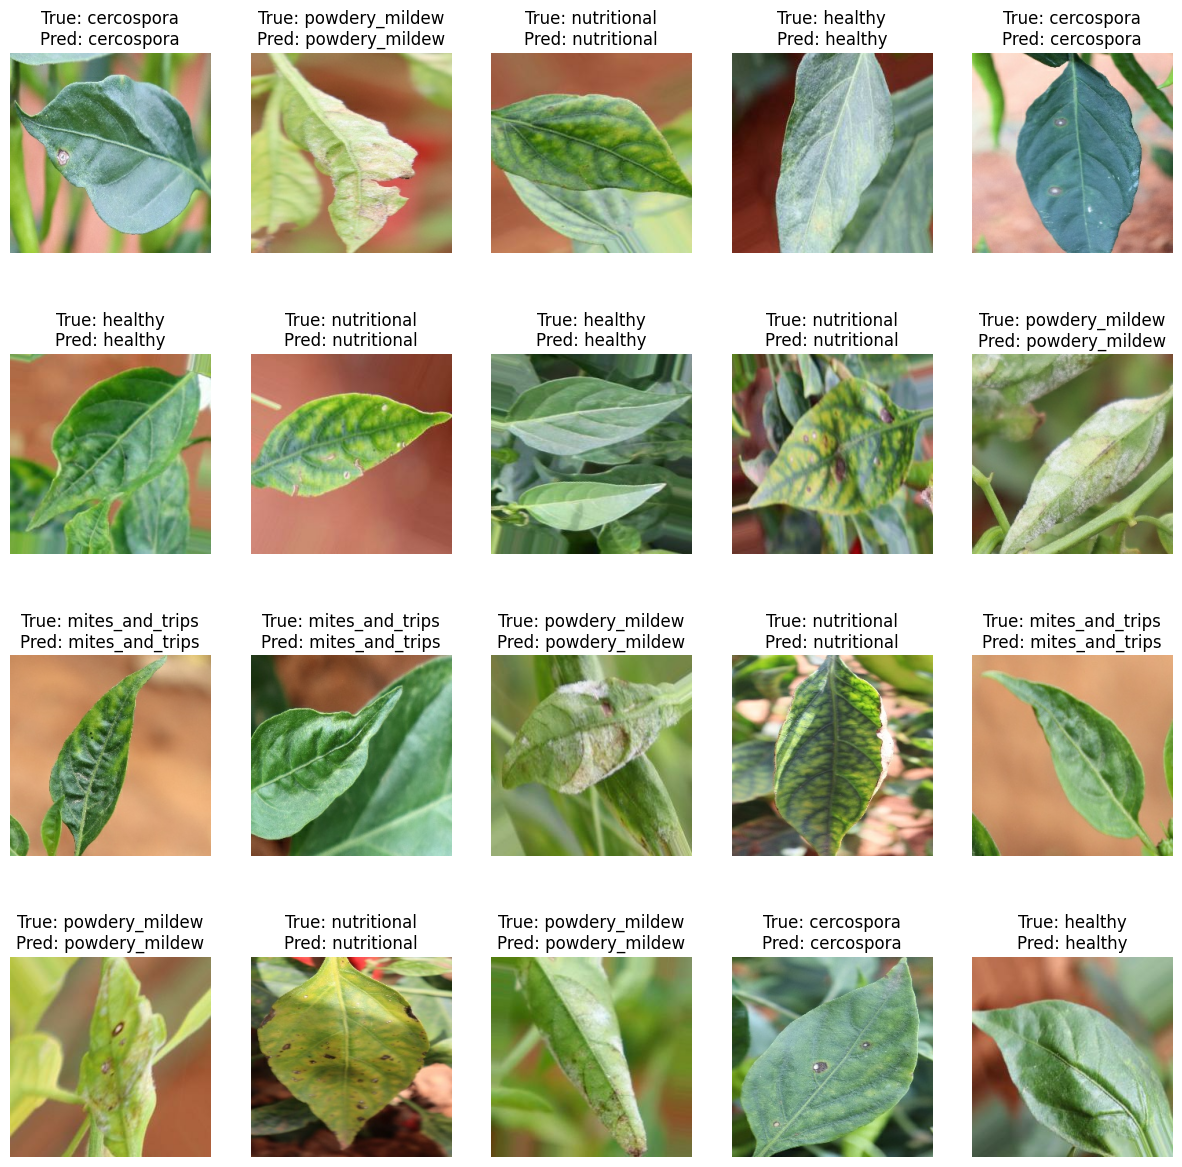

In [26]:
class_names = ['cercospora', 'healthy', 'mites_and_trips', 'nutritional', 'powdery_mildew']

for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    plt.figure(figsize=(15, 15))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        true_label_str = class_names[true_labels[i]]
        predicted_label_str = class_names[predicted_labels[i]]

        plt.title(f"True: {true_label_str}\nPred: {predicted_label_str}")
        plt.axis('off')

    plt.show()


# Save model

In [28]:
!mkdir -p /content/saved_model

In [29]:
SAVE_DIR = '/content/saved_model/final_model.keras'
model.save(SAVE_DIR)

# Convert model to TFLite form

In [31]:
model = tf.keras.models.load_model(SAVE_DIR)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

TFLITE_DIR = '/content/saved_model/final_model.tflite'

with open(TFLITE_DIR, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpdwokmyhp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  135330370834624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135330370835856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135330370831280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135330370843072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993040208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993043728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993051648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993052352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993052528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993127056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135327993129344